In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

from matplotlib import animation

%matplotlib inline

Using TensorFlow backend.


In [2]:
optimizers = ['sgd','adam', 'rmsprop','Adagrad']

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

In [4]:
np.random.seed(12)

In [5]:
def function(x):
    return abs(math.sin(x))**(1/2)

In [6]:
X = np.linspace(-4,4,400)
y = np.array(list(map(function,X)))

x_train = np.array([X[i] for i in range(0,len(X),2)])
y_train = np.array([y[i] for i in range(0,len(y),2)])

x_test = np.array([X[i] for i in range(0,len(X),5)])
y_test = np.array([y[i] for i in range(0,len(y),5)])

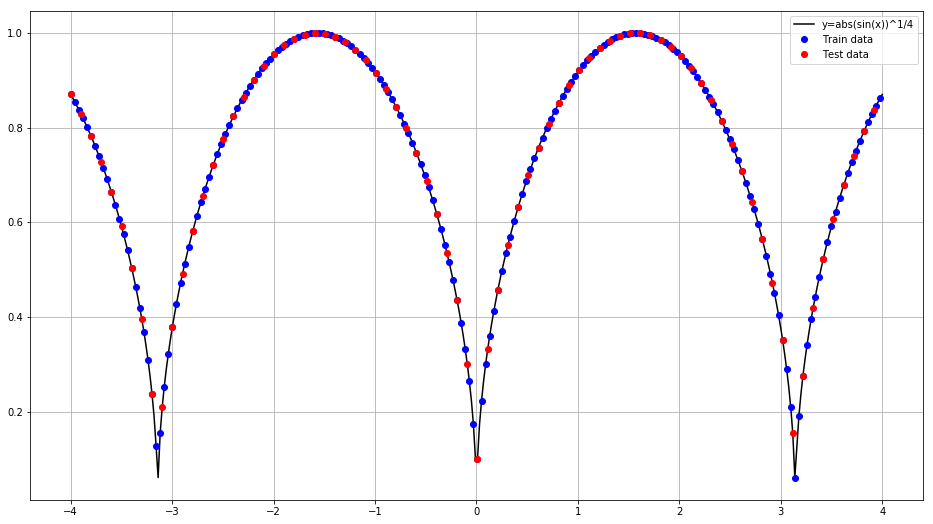

In [7]:
plt.plot(X,y, label='y=abs(sin(x))^1/4', color='#000000')
plt.plot(x_train,y_train,'o',color='#0000FF',label='Train data')
plt.plot(x_test,y_test,'o',color='#FF0000',label='Test data', linewidth=6)
plt.grid()
plt.legend()
plt.show()

In [10]:
neurons_type = 'selu'
epochs_number = 15

In [11]:
losses = []

In [12]:
for optimizer in optimizers:
    
    model = Sequential()
    
    model.add(Dense(55, input_dim=1, activation=neurons_type, kernel_initializer='he_normal'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(loss='mae', optimizer=optimizer)
    
    loss = {'loss':[], 'val_loss':[]}
        
    for epoch in range(epochs_number): 
        
        print('Optimizer: {0}. Epoch: {1}'.format(optimizer, epoch*10))
        
        hist = model.fit(x_train, y_train, batch_size=10, epochs=10, verbose=2, validation_data=(x_test,y_test))
        
        loss['loss'].extend(hist.history['loss'])
        loss['val_loss'].extend(hist.history['val_loss'])
        
    losses.append(loss)
    model.save('model {0}.h5'.format(optimizer))    

Optimizer: sgd. Epoch: 0
Train on 200 samples, validate on 80 samples
Epoch 1/10
2s - loss: 0.9308 - val_loss: 0.4912
Epoch 2/10
0s - loss: 0.8301 - val_loss: 0.8109
Epoch 3/10
0s - loss: 0.9600 - val_loss: 0.6028
Epoch 4/10
0s - loss: 0.7557 - val_loss: 0.4317
Epoch 5/10
0s - loss: 0.7360 - val_loss: 0.2842
Epoch 6/10
0s - loss: 0.6505 - val_loss: 0.4587
Epoch 7/10
0s - loss: 0.8520 - val_loss: 1.5767
Epoch 8/10
0s - loss: 0.7240 - val_loss: 0.8450
Epoch 9/10
0s - loss: 0.9003 - val_loss: 0.3217
Epoch 10/10
0s - loss: 0.7909 - val_loss: 0.5257
Optimizer: sgd. Epoch: 10
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.8397 - val_loss: 0.3741
Epoch 2/10
0s - loss: 0.7174 - val_loss: 1.1488
Epoch 3/10
0s - loss: 0.8210 - val_loss: 0.7579
Epoch 4/10
0s - loss: 0.7448 - val_loss: 0.2679
Epoch 5/10
0s - loss: 0.8203 - val_loss: 0.5005
Epoch 6/10
0s - loss: 0.8850 - val_loss: 0.9193
Epoch 7/10
0s - loss: 0.7697 - val_loss: 0.6209
Epoch 8/10
0s - loss: 0.8353 - val_loss: 0

0s - loss: 0.5797 - val_loss: 1.0639
Epoch 10/10
0s - loss: 0.5225 - val_loss: 0.4689
Optimizer: adam. Epoch: 0
Train on 200 samples, validate on 80 samples
Epoch 1/10
1s - loss: 3.5183 - val_loss: 2.4747
Epoch 2/10
0s - loss: 1.5311 - val_loss: 0.5567
Epoch 3/10
0s - loss: 0.3965 - val_loss: 0.2681
Epoch 4/10
0s - loss: 0.2151 - val_loss: 0.1884
Epoch 5/10
0s - loss: 0.1813 - val_loss: 0.1689
Epoch 6/10
0s - loss: 0.1691 - val_loss: 0.1638
Epoch 7/10
0s - loss: 0.1643 - val_loss: 0.1611
Epoch 8/10
0s - loss: 0.1659 - val_loss: 0.1714
Epoch 9/10
0s - loss: 0.1653 - val_loss: 0.1582
Epoch 10/10
0s - loss: 0.1608 - val_loss: 0.1569
Optimizer: adam. Epoch: 10
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.1618 - val_loss: 0.1561
Epoch 2/10
0s - loss: 0.1609 - val_loss: 0.1613
Epoch 3/10
0s - loss: 0.1583 - val_loss: 0.1694
Epoch 4/10
0s - loss: 0.1582 - val_loss: 0.1539
Epoch 5/10
0s - loss: 0.1554 - val_loss: 0.1530
Epoch 6/10
0s - loss: 0.1561 - val_loss: 0.1726
Ep

0s - loss: 0.1230 - val_loss: 0.1145
Epoch 8/10
0s - loss: 0.1163 - val_loss: 0.1130
Epoch 9/10
0s - loss: 0.1169 - val_loss: 0.1147
Epoch 10/10
0s - loss: 0.1136 - val_loss: 0.1189
Optimizer: rmsprop. Epoch: 0
Train on 200 samples, validate on 80 samples
Epoch 1/10
1s - loss: 0.5761 - val_loss: 0.2948
Epoch 2/10
0s - loss: 0.2662 - val_loss: 0.2438
Epoch 3/10
0s - loss: 0.2284 - val_loss: 0.2226
Epoch 4/10
0s - loss: 0.2010 - val_loss: 0.2198
Epoch 5/10
0s - loss: 0.1992 - val_loss: 0.2026
Epoch 6/10
0s - loss: 0.1909 - val_loss: 0.1797
Epoch 7/10
0s - loss: 0.1836 - val_loss: 0.1843
Epoch 8/10
0s - loss: 0.1832 - val_loss: 0.1811
Epoch 9/10
0s - loss: 0.1760 - val_loss: 0.1858
Epoch 10/10
0s - loss: 0.1935 - val_loss: 0.1774
Optimizer: rmsprop. Epoch: 10
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.1876 - val_loss: 0.1716
Epoch 2/10
0s - loss: 0.1815 - val_loss: 0.1690
Epoch 3/10
0s - loss: 0.1797 - val_loss: 0.1996
Epoch 4/10
0s - loss: 0.1791 - val_loss: 0.1

0s - loss: 0.1089 - val_loss: 0.1203
Epoch 5/10
0s - loss: 0.1232 - val_loss: 0.1078
Epoch 6/10
0s - loss: 0.1228 - val_loss: 0.1017
Epoch 7/10
0s - loss: 0.1193 - val_loss: 0.1127
Epoch 8/10
0s - loss: 0.1263 - val_loss: 0.1627
Epoch 9/10
0s - loss: 0.1157 - val_loss: 0.1264
Epoch 10/10
0s - loss: 0.1274 - val_loss: 0.1060
Optimizer: Adagrad. Epoch: 0
Train on 200 samples, validate on 80 samples
Epoch 1/10
1s - loss: 0.7086 - val_loss: 0.2703
Epoch 2/10
0s - loss: 0.2177 - val_loss: 0.2262
Epoch 3/10
0s - loss: 0.2087 - val_loss: 0.1888
Epoch 4/10
0s - loss: 0.2075 - val_loss: 0.2284
Epoch 5/10
0s - loss: 0.2039 - val_loss: 0.2163
Epoch 6/10
0s - loss: 0.1947 - val_loss: 0.1986
Epoch 7/10
0s - loss: 0.1963 - val_loss: 0.1849
Epoch 8/10
0s - loss: 0.1908 - val_loss: 0.1856
Epoch 9/10
0s - loss: 0.1922 - val_loss: 0.1887
Epoch 10/10
0s - loss: 0.1831 - val_loss: 0.1771
Optimizer: Adagrad. Epoch: 10
Train on 200 samples, validate on 80 samples
Epoch 1/10
0s - loss: 0.1892 - val_loss: 0.1

0s - loss: 0.1243 - val_loss: 0.1241
Epoch 2/10
0s - loss: 0.1275 - val_loss: 0.1228
Epoch 3/10
0s - loss: 0.1257 - val_loss: 0.1225
Epoch 4/10
0s - loss: 0.1245 - val_loss: 0.1230
Epoch 5/10
0s - loss: 0.1250 - val_loss: 0.1217
Epoch 6/10
0s - loss: 0.1271 - val_loss: 0.1216
Epoch 7/10
0s - loss: 0.1249 - val_loss: 0.1263
Epoch 8/10
0s - loss: 0.1239 - val_loss: 0.1210
Epoch 9/10
0s - loss: 0.1246 - val_loss: 0.1208
Epoch 10/10
0s - loss: 0.1240 - val_loss: 0.1229


Optimizer: sgd.


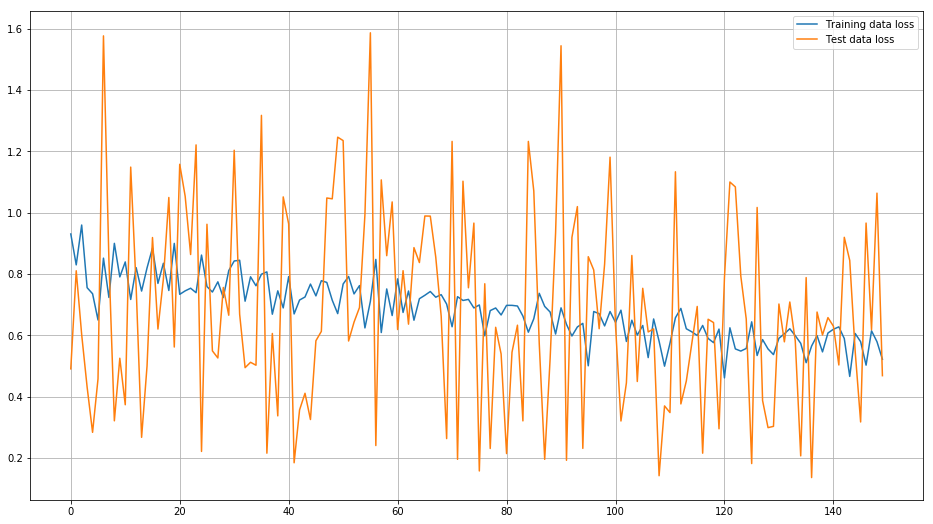

Optimizer: adam.


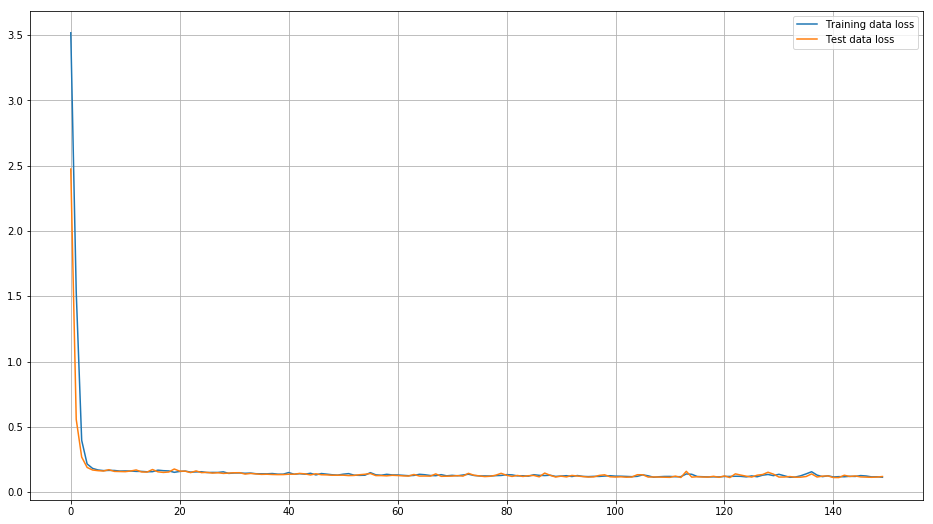

Optimizer: rmsprop.


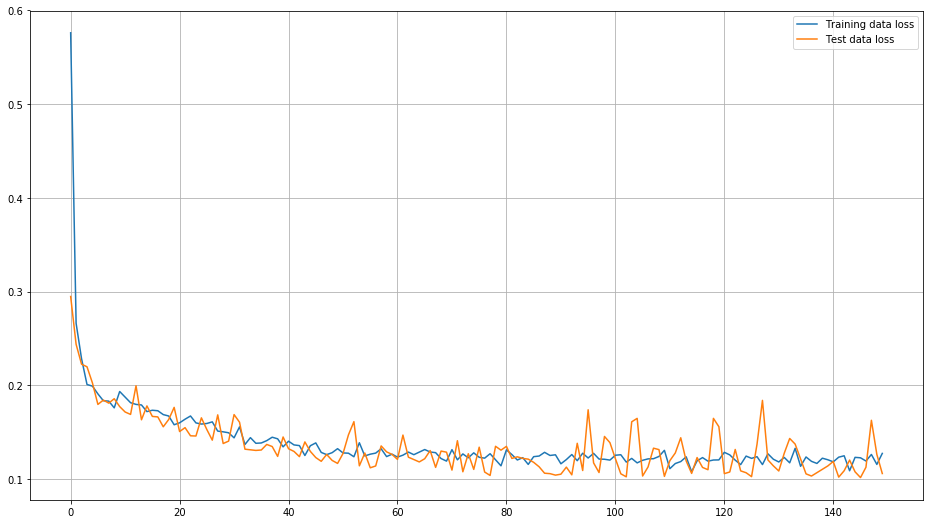

Optimizer: Adagrad.


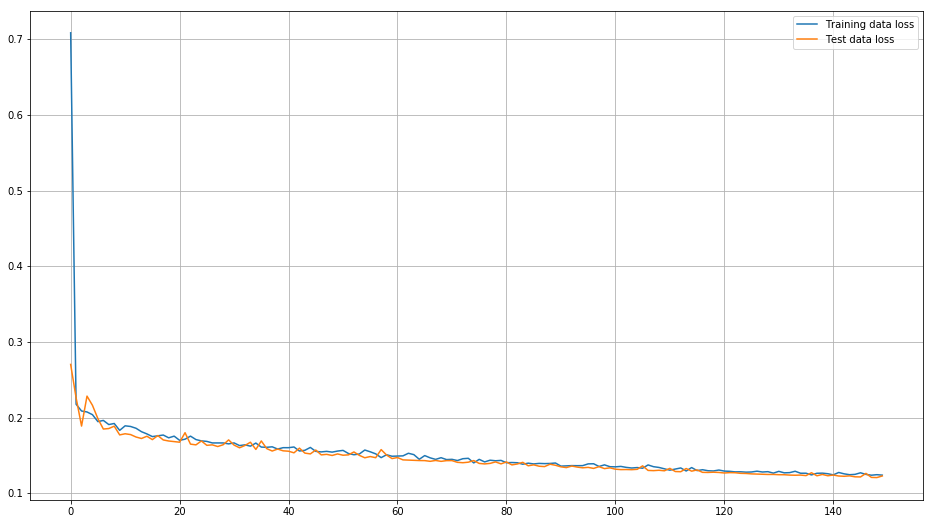

In [14]:
for optimizer, loss in zip(optimizers, losses):
    print("Optimizer: {0}.".format(optimizer))
    plt.plot(loss['loss'], label='Training data loss')
    plt.plot(loss['val_loss'], label='Test data loss')
#     plt.axis([0, 500, 0, 0.5])
    plt.grid()
    plt.legend()
    plt.show()

In [15]:
predictions = {}

for file in os.listdir():
    if file.endswith('.h5'):
        model = load_model(file)
        predictions[file] = model.predict(X)

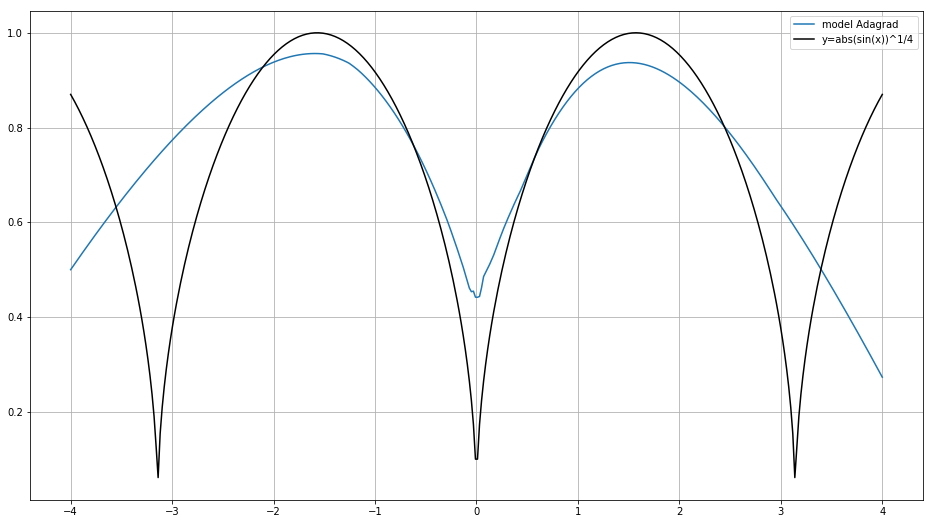

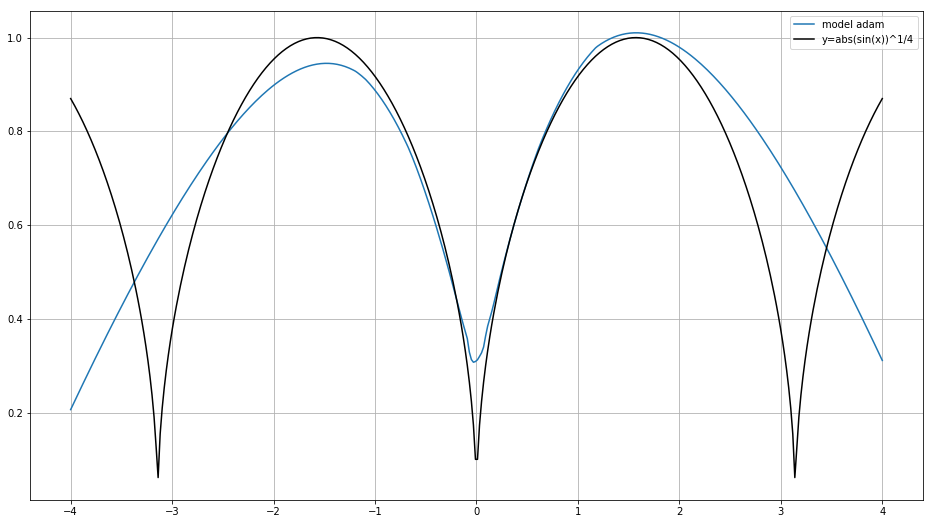

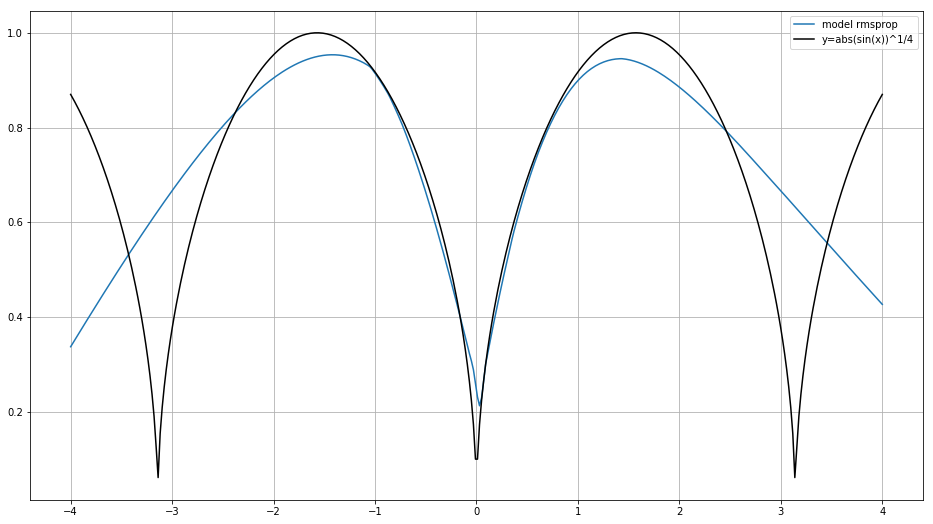

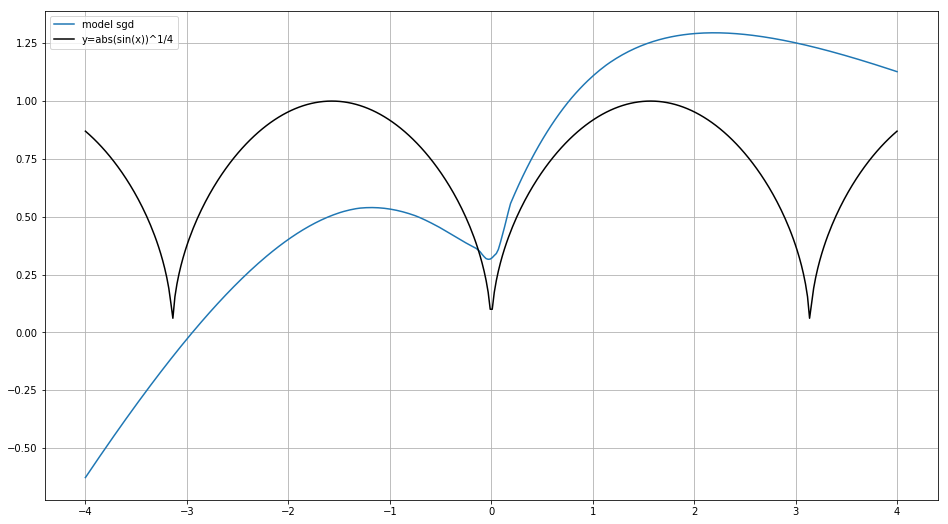

In [16]:
for file in predictions:
    plt.plot(X, predictions[file], label=file[:-3])
    plt.plot(X,y, label='y=abs(sin(x))^1/4', color='#000000')
    plt.grid()
    plt.legend()
    plt.show()

# Conclusion:
RMSProp is better. SGD works so bad.